In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (5,3)

/var/folders/5h/w_ddszcj1b9581y293ys2dw40000gn/T/ipykernel_3155/1855272890.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
da = pd.read_csv('Ecology Data 4a.csv')
db = pd.read_csv('Ecology Data 4b.csv')

In [3]:
print(da.describe())

           N           y           x
count  100.0  100.000000  100.000000
mean     8.0    5.080000    9.967200
std      0.0    2.743882    1.088954
min      8.0    0.000000    7.660000
25%      8.0    3.000000    9.337500
50%      8.0    6.000000    9.965000
75%      8.0    8.000000   10.770000
max      8.0    8.000000   12.440000


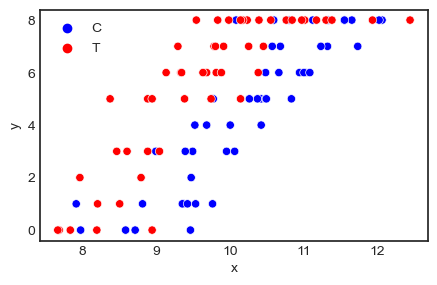

In [4]:
#x,y scatter
palette = {'T': 'r', 'C': 'b'}
sns.scatterplot(data=da, x='x', y='y', hue='f', palette=palette)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
#glm
#biominal
glm = smf.glm('y + I(N-y) ~ x + f', data=da, family=sm.families.Binomial()).fit()
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Sat, 01 Jun 2024   Deviance:                       123.03
Time:                        17:55:37   Pearson chi2:                     109.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9768
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.0

In [6]:
#glm
model = smf.glm('y + I(8-y) ~ x * f', data=da, family=sm.families.Binomial()).fit()
print(model.summary())
print(model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(8 - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Sat, 01 Jun 2024   Deviance:                       122.43
Time:                        17:55:29   Pearson chi2:                     109.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9769
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.0

In [7]:
data = {
    "x": [0.00100000, 0.01730612, 0.03361224, 0.04991837, 0.06622449, 0.08253061, 0.09883673, 0.11514286, 0.13144898, 0.14775510, 
          0.16406122, 0.18036735, 0.19667347, 0.21297959, 0.22928571, 0.24559184, 0.26189796, 0.27820408, 0.29451020, 0.31081633, 
          0.32712245, 0.34342857, 0.35973469, 0.37604082, 0.39234694, 0.40865306, 0.42495918, 0.44126531, 0.45757143, 0.47387755, 
          0.49018367, 0.50648980, 0.52279592, 0.53910204, 0.55540816, 0.57171429, 0.58802041, 0.60432653, 0.62063265, 0.63693878, 
          0.65324490, 0.66955102, 0.68585714, 0.70216327, 0.71846939, 0.73477551, 0.75108163, 0.76738776, 0.78369388, 0.80000000],
    "y": [0.0008873584, 0.0234652087, 0.0698755633, 0.0343402528, 0.0265204047, 0.1592148027, 0.1650783893, 0.1240028738, 
          0.0596455047, 0.0552452656, 0.1922147499, 0.0305346235, 0.1050614252, 0.0762759220, 0.1524998027, 0.0564525639, 
          0.0959048838, 0.1194826880, 0.0379757879, 0.1923054736, 0.1833032150, 0.0949801840, 0.0912946482, 0.1452412815, 
          0.1090217347, 0.2394445515, 0.1933050241, 0.2026793230, 0.2090867442, 0.2804643819, 0.3679867385, 0.1539352560, 
          0.1653358407, 0.2970396128, 0.3508910552, 0.1824436007, 0.1344558643, 0.4186216605, 0.3261179044, 0.0558967727, 
          0.2488526264, 0.4834364850, 0.1486623573, 0.0416329786, 0.6145356400, 0.1978335852, 0.1915292152, 0.3220098859, 
          0.4539202940, 0.1788958933]
}
df = pd.DataFrame(data)
df.head()

,x,y
0,0.001000,0.000887
1,0.017306,0.023465
2,0.033612,0.069876
3,0.049918,0.034340
4,0.066224,0.026520


In [8]:
model = smf.glm(formula='y ~ np.log(x)', data=df, family=sm.families.Gamma(link=sm.families.links.log()))
model = model.fit()
print(model.summary())

/Users/sa2007/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.32508
Method:                          IRLS   Log-Likelihood:                 58.471
Date:                Sat, 01 Jun 2024   Deviance:                       17.251
Time:                        17:55:29   Pearson chi2:                     15.6
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6720
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0403      0.119     -8.759      0.0